# LeadInsight Analyser: Painting the Story of Lead Engagements

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime as dt

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_excel("Telemarketing.xlsx", header=2)
df.head(4)

,Timestamp,Lead Name,Lead Validation,Calling Date & Time,Picked the phone,Reason Why Phone is not picked,Email (Optional),City,Lead Interested or Not,Insert Meeting Date & Time Slot,Please state the major highlights of the call.,Select the Reason
0,2019/11/30 11:59:05 AM GMT+5:30,Naveen Garg,Valid Contact,2019-11-30 10:20:00,Yes,NaN,NaN,Kota,No,NaT,NaN,all read used solar
1,2019/11/23 7:33:23 PM GMT+5:30,Harish,Valid Contact,2019-11-23 12:10:00,Yes,NaN,NaN,Kota,No,NaT,NaN,all ready solar used
2,2019/11/11 4:27:04 PM GMT+5:30,Shubh Hospital,Valid Contact,2019-11-11 16:20:00,Yes,NaN,NaN,Jaipur,No,NaT,NaN,all ready used
3,2019/11/11 4:12:52 PM GMT+5:30,Rukmani Birla Hospital CK Birla,Valid Contact,2019-11-11 15:24:00,Yes,NaN,NaN,Jaipur,No,NaT,NaN,all ready used solar


In [35]:
df.shape

(1570, 12)

In [36]:
df.dtypes

Timestamp                                                 object
Lead Name                                                 object
Lead Validation                                           object
Calling Date & Time                               datetime64[ns]
Picked the phone                                          object
Reason Why Phone is not picked                            object
Email (Optional)                                          object
City                                                      object
Lead Interested or Not                                    object
Insert Meeting Date & Time Slot                   datetime64[ns]
Please state the major highlights of the call.            object
Select the Reason                                         object
dtype: object

In [37]:
pred_cols = df.columns.to_list()

In [38]:
fill_rate_df = pd.DataFrame(df[pred_cols].count()/df.shape[0]*100, columns=['fill_rate'])
fill_rate_df

,fill_rate
Timestamp,100.000000
Lead Name,100.000000
Lead Validation,100.000000
Calling Date & Time,96.624204
Picked the phone,96.624204
Reason Why Phone is not picked,35.923567
Email (Optional),0.254777
City,100.000000
Lead Interested or Not,46.751592
Insert Meeting Date & Time Slot,4.840764


In [39]:
df.describe(datetime_is_numeric=True).transpose()

,count,mean,min,25%,50%,75%,max
Calling Date & Time,1517,2019-11-19 10:32:12.023730944,2019-10-04 17:00:00,2019-11-13 11:17:00,2019-11-20 00:00:00,2019-11-26 11:57:00,2019-11-30 23:22:00
Insert Meeting Date & Time Slot,76,2019-11-17 15:25:47.368421376,2019-11-05 10:00:00,2019-11-08 05:00:00,2019-11-14 14:00:00,2019-11-27 08:00:00,2019-12-20 15:00:00


In [40]:
df.describe().transpose()

/var/folders/2t/kws3z2h52bl_tmtkx1j12xnw0000gn/T/ipykernel_73640/609525639.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe().transpose()
/var/folders/2t/kws3z2h52bl_tmtkx1j12xnw0000gn/T/ipykernel_73640/609525639.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe().transpose()


,count,unique,top,freq,first,last
Timestamp,1570,1569,2019/11/05 5:46:37 PM GMT+5:30,2,NaT,NaT
Lead Name,1570,1046,not given,37,NaT,NaT
Lead Validation,1570,2,Valid Contact,1517,NaT,NaT
Calling Date & Time,1517,1130,2019-11-28 11:20:00,7,2019-10-04 17:00:00,2019-11-30 23:22:00
Picked the phone,1517,3,Yes,737,NaT,NaT
Reason Why Phone is not picked,564,6,Not Picked the Call,288,NaT,NaT
Email (Optional),4,4,Petalsindor@gmail.com,1,NaT,NaT
City,1570,4,Jaipur,708,NaT,NaT
Lead Interested or Not,734,2,No,658,NaT,NaT
Insert Meeting Date & Time Slot,76,60,2019-12-01 12:00:00,3,2019-11-05 10:00:00,2019-12-20 15:00:00


In [41]:
df.dtypes

Timestamp                                                 object
Lead Name                                                 object
Lead Validation                                           object
Calling Date & Time                               datetime64[ns]
Picked the phone                                          object
Reason Why Phone is not picked                            object
Email (Optional)                                          object
City                                                      object
Lead Interested or Not                                    object
Insert Meeting Date & Time Slot                   datetime64[ns]
Please state the major highlights of the call.            object
Select the Reason                                         object
dtype: object

**Insights**
- `Email` feature has the lowest fill rate, which is 0.25%
- `Lead Name` is has all unique values and would not be of much contribution in the analysis
- There are 9 categorical features and 3 datetime features
- Took `Lead Interested`, `City` and `Insert Meeting Date & Time Slot` as the target feature to base the analysis on. Considering that, the **dataset seems extremely imbalanced.**

In [42]:
df['Timestamp'] = df['Timestamp'].apply(lambda date_time: date_time[:-9])
df['Timestamp']

0       2019/11/30 11:59:05 AM
1        2019/11/23 7:33:23 PM
2        2019/11/11 4:27:04 PM
3        2019/11/11 4:12:52 PM
4        2019/11/11 4:25:38 PM
                 ...          
1565     2019/11/30 7:37:02 PM
1566     2019/11/30 7:39:36 PM
1567     2019/11/30 7:41:09 PM
1568     2019/11/30 7:43:11 PM
1569     2019/11/30 7:48:31 PM
Name: Timestamp, Length: 1570, dtype: object

In [43]:
df['Timestamp'] = df['Timestamp'].apply(lambda date_time: dt.strptime(date_time, '%Y/%m/%d %I:%M:%S %p'))
df['Timestamp']

0      2019-11-30 11:59:05
1      2019-11-23 19:33:23
2      2019-11-11 16:27:04
3      2019-11-11 16:12:52
4      2019-11-11 16:25:38
               ...        
1565   2019-11-30 19:37:02
1566   2019-11-30 19:39:36
1567   2019-11-30 19:41:09
1568   2019-11-30 19:43:11
1569   2019-11-30 19:48:31
Name: Timestamp, Length: 1570, dtype: datetime64[ns]

In [58]:
df['Day of Week'] = df['Timestamp'].dt.dayofweek

In [59]:
df['Day of Week'].value_counts()

1    310
0    298
4    275
3    269
5    222
2    196
Name: Day of Week, dtype: int64

- Maximum number of calls were made on Tuesday and the lowest were made on Wednesday.
- There are no calls recorded for Sunday.

In [46]:
df['Time_Bucket'] = pd.cut(df['Timestamp'].dt.hour,
                            bins=[0, 12, 17, 24],
                            labels=['Morning', 'Noon', 'Evening'],
                            include_lowest=True,
                            right=False)

print(df[['Time_Bucket']])

     Time_Bucket
0        Morning
1        Evening
2           Noon
3           Noon
4           Noon
...          ...
1565     Evening
1566     Evening
1567     Evening
1568     Evening
1569     Evening

[1570 rows x 1 columns]


## Univariate Analysis

### Lead Validation

In [47]:
df['Lead Validation'].value_counts(normalize=True, dropna=False)*100

Valid Contact      96.624204
Invalid Contact     3.375796
Name: Lead Validation, dtype: float64

- The contact list that the company possesses is legitimate as 96% of the contacts are valid

### Picked the Phone

In [48]:
df['Picked the phone'].value_counts(normalize=True, dropna=False)*100

Yes                                 46.942675
No                                  35.923567
Yes, but mentioned to call later    13.757962
NaN                                  3.375796
Name: Picked the phone, dtype: float64

In [49]:
df['Picked the phone'] = df['Picked the phone'].replace({'Yes, but mentioned to call later': 'Yes'})

In [50]:
df['Picked the phone'].value_counts(normalize=True, dropna=False)*100

Yes    60.700637
No     35.923567
NaN     3.375796
Name: Picked the phone, dtype: float64

### Reason Why Phone is not picked

In [51]:
df['Reason Why Phone is not picked'].value_counts(normalize=True, dropna=False)*100

NaN                            64.076433
Not Picked the Call            18.343949
Not reachable at the moment     6.751592
Busy, on another call           6.433121
Switch-Off                      3.312102
Temporarily Out of Service      0.955414
not pickup the call             0.127389
Name: Reason Why Phone is not picked, dtype: float64

In [52]:
df['Reason Why Phone is not picked'] = df['Reason Why Phone is not picked'].replace({'not pickup the call ': 'Not Picked the Call'})

In [53]:
df['Reason Why Phone is not picked'].value_counts(normalize=True, dropna=False)*100

NaN                            64.076433
Not Picked the Call            18.471338
Not reachable at the moment     6.751592
Busy, on another call           6.433121
Switch-Off                      3.312102
Temporarily Out of Service      0.955414
Name: Reason Why Phone is not picked, dtype: float64

### Lead Interested or Not

In [81]:
df['Lead Interested or Not'].value_counts(normalize=True, dropna=False)*100

NaN    53.248408
No     41.910828
Yes     4.840764
Name: Lead Interested or Not, dtype: float64

### Meeting Scheduled?

In [54]:
df['meeting_scheduled'] = np.where(~df['Insert Meeting Date & Time Slot'].isna(), 1, 0)

In [55]:
df['meeting_scheduled'].value_counts(normalize=True)*100

0    95.159236
1     4.840764
Name: meeting_scheduled, dtype: float64

- `Lead Interested or Not` and `Insert Meeting Date & Time Slot` have same results. So, we shall use `Insert Meeting Date & Time Slot` feature only.
- There is only 4% lead conversion rate

### Cities Targeted

In [56]:
df['City'].value_counts(normalize=True, dropna=False)*100

Jaipur    45.095541
Indore    34.458599
Kota      20.318471
Other      0.127389
Name: City, dtype: float64

## Bivariate & Multivariate Analysis

### Customer picked up the phone
    - Day of the Week
    - Time Bucket
    - City

- Day of the Week

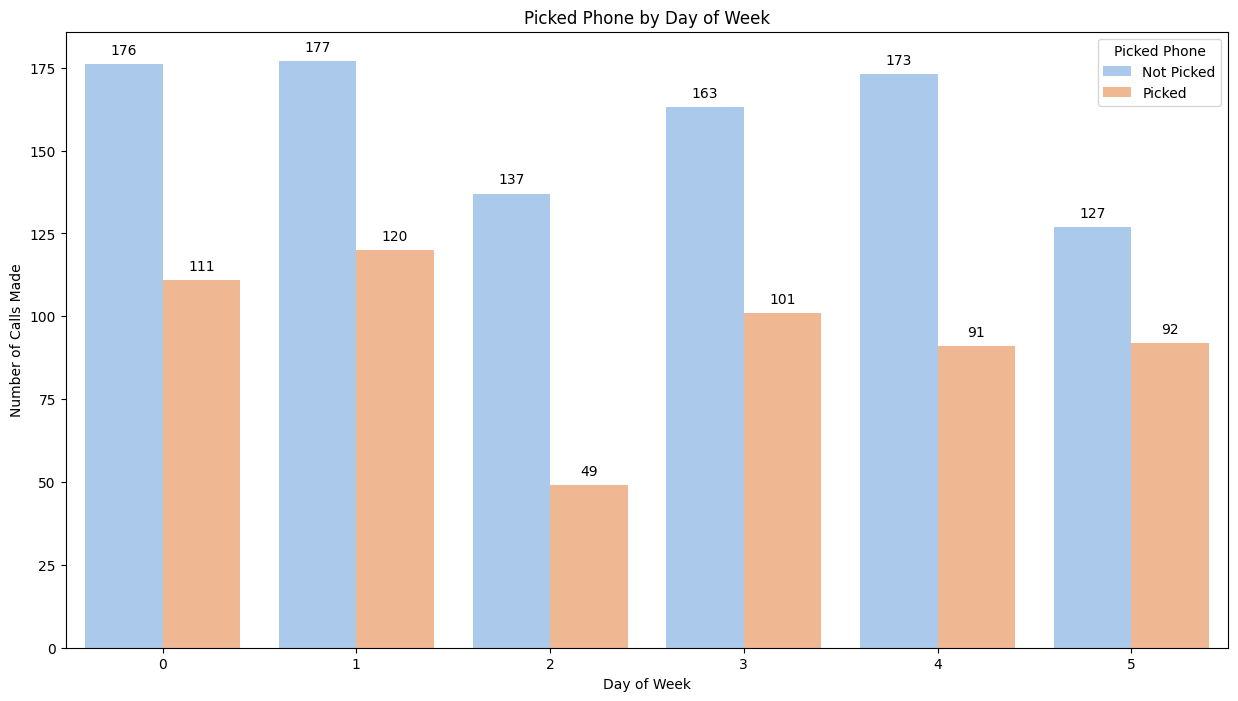

In [65]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Day of Week', hue='Picked the phone', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Day of Week')
plt.ylabel('Number of Calls Made')
plt.title('Picked Phone by Day of Week')
plt.legend(title='Picked Phone', labels=['Not Picked', 'Picked'])
plt.show()

- Time Bucket

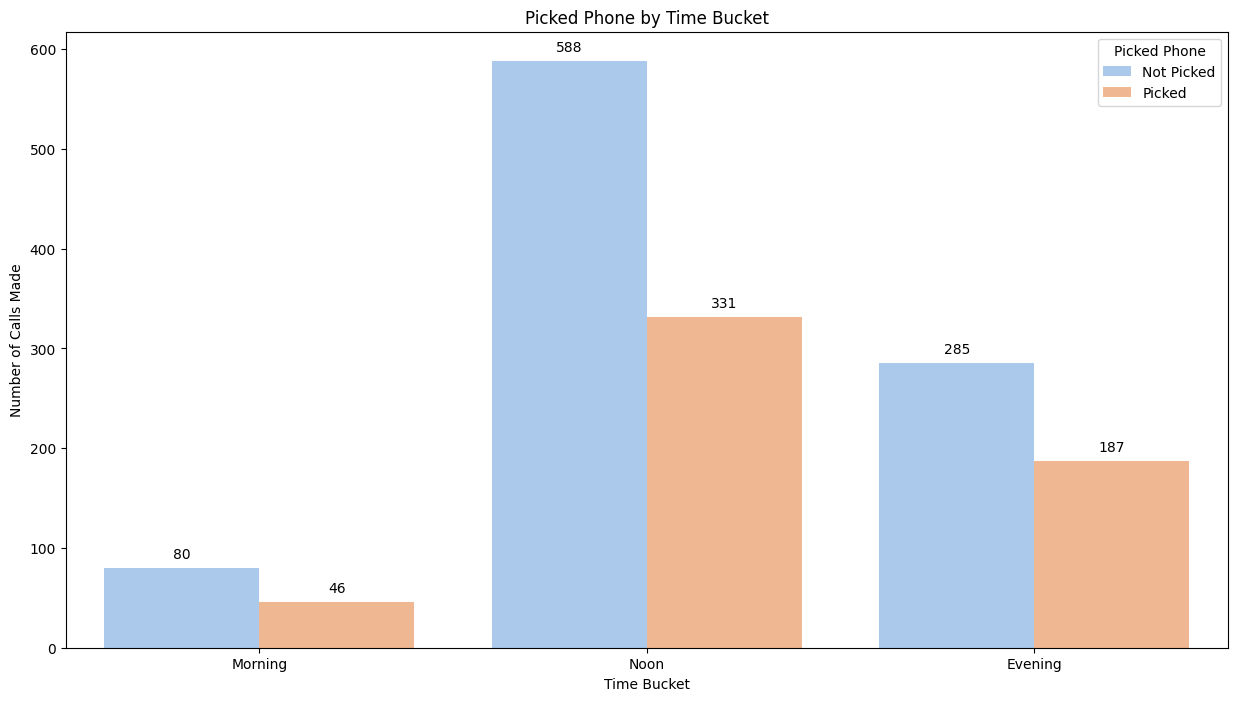

In [63]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Time_Bucket', hue='Picked the phone', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Time Bucket')
plt.ylabel('Number of Calls Made')
plt.title('Picked Phone by Time Bucket')
plt.legend(title='Picked Phone', labels=['Not Picked', 'Picked'])
plt.show()

- City

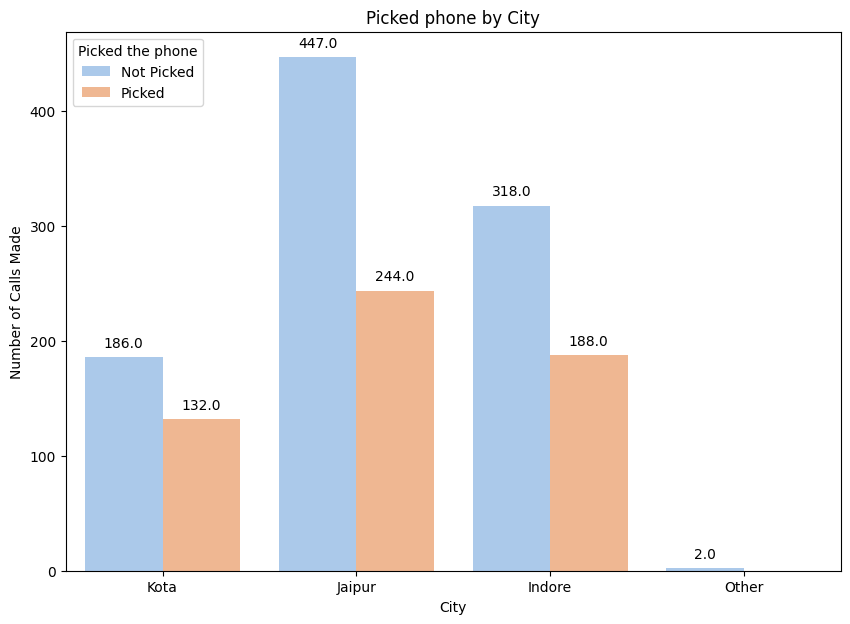

In [70]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='City', hue='Picked the phone', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('City')
plt.ylabel('Number of Calls Made')
plt.title('Picked phone by City')
plt.legend(title='Picked the phone', labels=['Not Picked', 'Picked'])
plt.show()

### Meeting Scheduled?
    - Day of the Week
    - Time Bucket
    - City

- Day of the Week

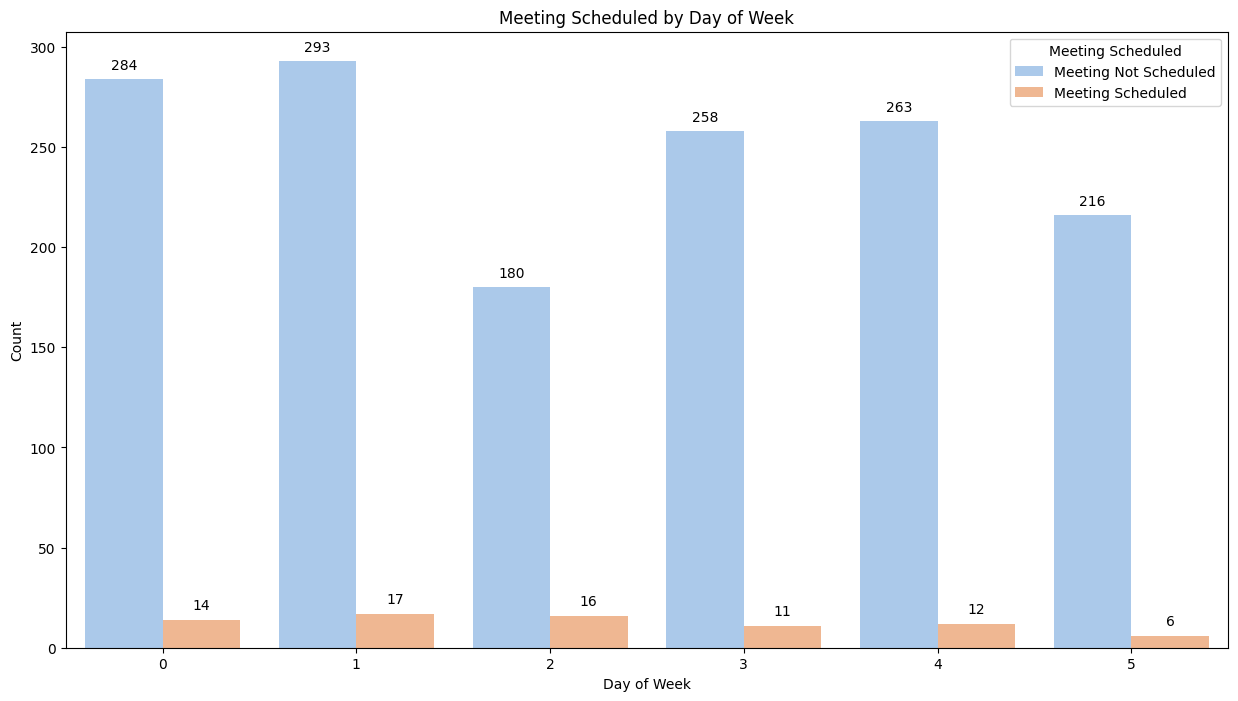

In [76]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Day of Week', hue='meeting_scheduled', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Meeting Scheduled by Day of Week')
plt.legend(title='Meeting Scheduled', labels=['Meeting Not Scheduled', 'Meeting Scheduled'])
plt.show()

- Time Bucket

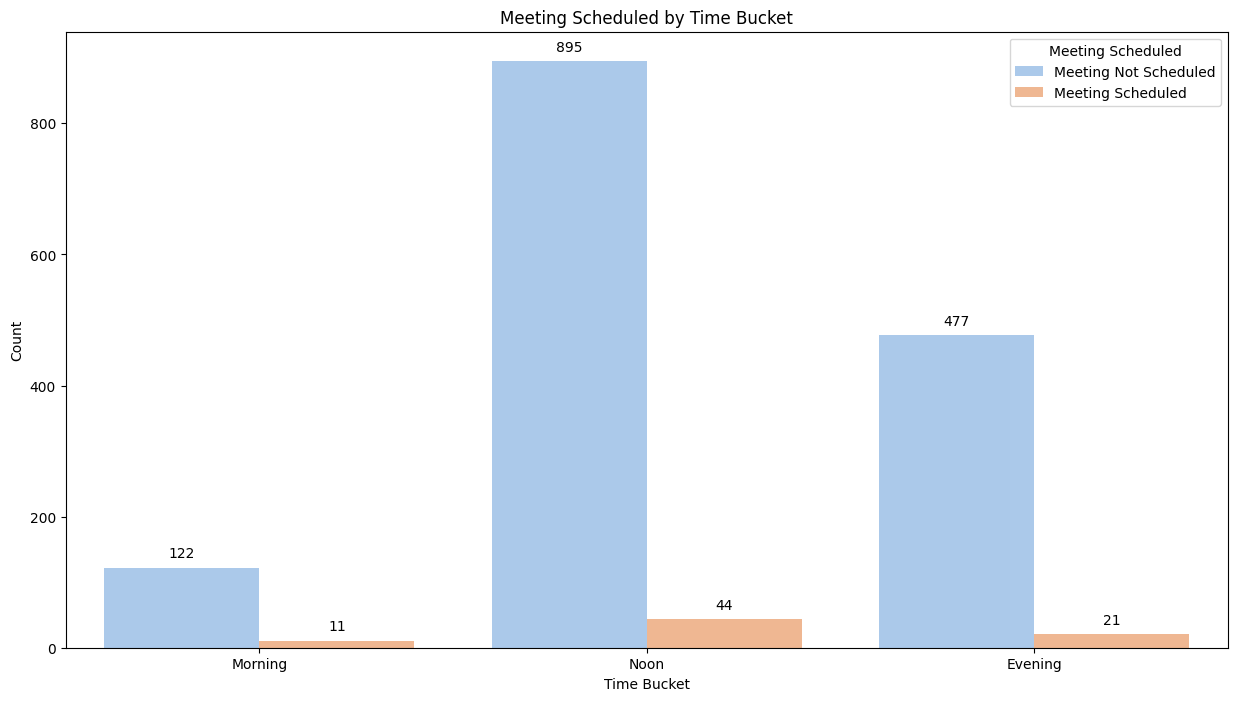

In [78]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Time_Bucket', hue='meeting_scheduled', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Time Bucket')
plt.ylabel('Count')
plt.title('Meeting Scheduled by Time Bucket')
plt.legend(title='Meeting Scheduled', labels=['Meeting Not Scheduled', 'Meeting Scheduled'])
plt.show()

- City

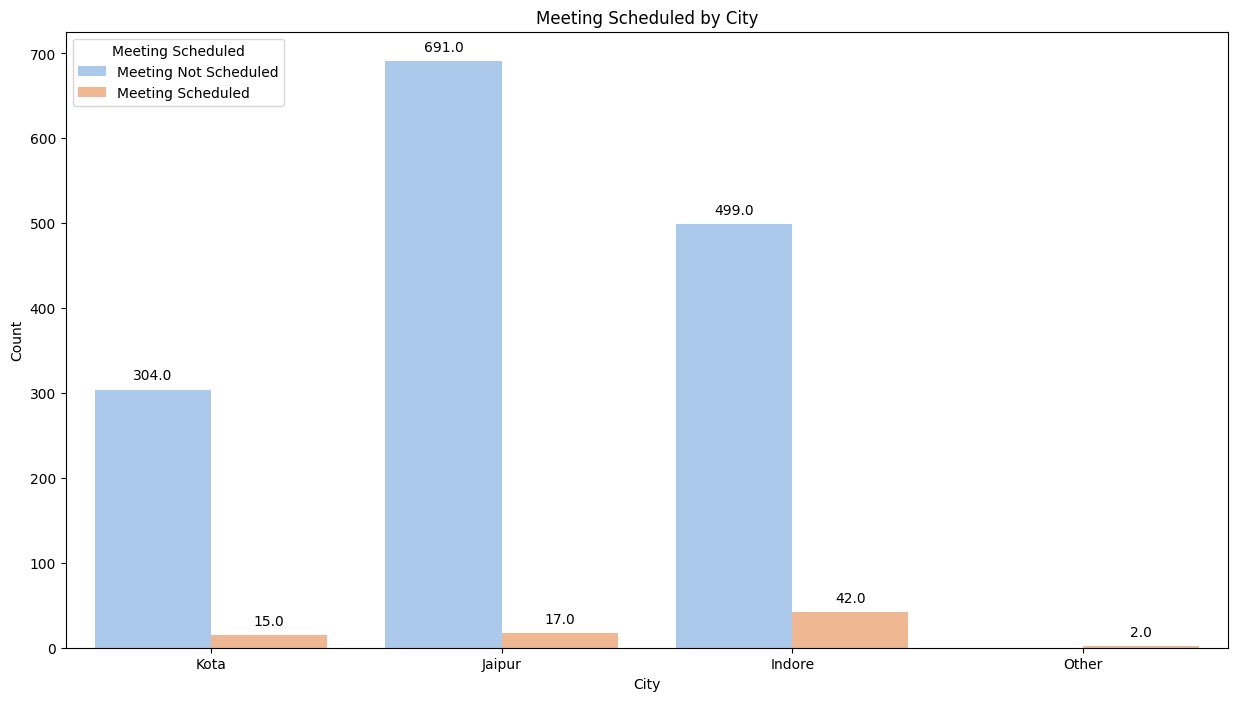

In [80]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='City', hue='meeting_scheduled', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Meeting Scheduled by City')
plt.legend(title='Meeting Scheduled', labels=['Meeting Not Scheduled', 'Meeting Scheduled'])
plt.show()